In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import datetime as dt

### Challenge 1

In [25]:
df1 = pd.read_csv('turnstile_190309.txt')
df2 = pd.read_csv('turnstile_190316.txt')
df3 = pd.read_csv('turnstile_190323.txt')
df4 = pd.read_csv('turnstile_190330.txt')


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203987 entries, 0 to 203986
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   203987 non-null  object
 1   UNIT                                                                  203987 non-null  object
 2   SCP                                                                   203987 non-null  object
 3   STATION                                                               203987 non-null  object
 4   LINENAME                                                              203987 non-null  object
 5   DIVISION                                                              203987 non-null  object
 6   DATE                                                                  203987 non-null  objec

In [26]:
df = pd.concat([df1, df2, df3, df4])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813096 entries, 0 to 204594
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   813096 non-null  object
 1   UNIT                                                                  813096 non-null  object
 2   SCP                                                                   813096 non-null  object
 3   STATION                                                               813096 non-null  object
 4   LINENAME                                                              813096 non-null  object
 5   DIVISION                                                              813096 non-null  object
 6   DATE                                                                  813096 non-null  objec

In [27]:
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,03:00:00,REGULAR,6963622,2362204
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,07:00:00,REGULAR,6963632,2362215
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,11:00:00,REGULAR,6963688,2362274
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,15:00:00,REGULAR,6963846,2362329
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,19:00:00,REGULAR,6964163,2362370


### Challenge 2

In [28]:
df['DATETIME'] = df['DATE'] + " " + df['TIME']

In [29]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,03:00:00,REGULAR,6963622,2362204,03/02/2019 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,07:00:00,REGULAR,6963632,2362215,03/02/2019 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,11:00:00,REGULAR,6963688,2362274,03/02/2019 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,15:00:00,REGULAR,6963846,2362329,03/02/2019 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,19:00:00,REGULAR,6964163,2362370,03/02/2019 19:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813096 entries, 0 to 204594
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C/A       813096 non-null  object
 1   UNIT      813096 non-null  object
 2   SCP       813096 non-null  object
 3   STATION   813096 non-null  object
 4   LINENAME  813096 non-null  object
 5   DIVISION  813096 non-null  object
 6   DATE      813096 non-null  object
 7   TIME      813096 non-null  object
 8   DESC      813096 non-null  object
 9   ENTRIES   813096 non-null  int64 
 10  EXITS     813096 non-null  int64 
 11  DATETIME  813096 non-null  object
dtypes: int64(2), object(10)
memory usage: 80.6+ MB


In [30]:
df.insert(0, 'Date_and_Time', [dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in df['DATETIME']])

In [31]:
df.head()

,Date_and_Time,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,2019-03-02 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,03:00:00,REGULAR,6963622,2362204,03/02/2019 03:00:00
1,2019-03-02 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,07:00:00,REGULAR,6963632,2362215,03/02/2019 07:00:00
2,2019-03-02 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,11:00:00,REGULAR,6963688,2362274,03/02/2019 11:00:00
3,2019-03-02 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,15:00:00,REGULAR,6963846,2362329,03/02/2019 15:00:00
4,2019-03-02 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,19:00:00,REGULAR,6964163,2362370,03/02/2019 19:00:00


In [20]:
# del df['DATE']

In [32]:
# del df['TIME']
del df['DATETIME']

In [33]:
df.head()

,Date_and_Time,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-03-02 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,03:00:00,REGULAR,6963622,2362204
1,2019-03-02 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,07:00:00,REGULAR,6963632,2362215
2,2019-03-02 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,11:00:00,REGULAR,6963688,2362274
3,2019-03-02 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,15:00:00,REGULAR,6963846,2362329
4,2019-03-02 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/02/2019,19:00:00,REGULAR,6964163,2362370


In [35]:
df.groupby(['STATION', 'DATE']).sum()

ENTRIES       EXITS
STATION   DATE                              
1 AV      03/02/2019  8474329599  8774786093
          03/03/2019  8474329625  8774786338
          03/04/2019  8474368954  8774828560
          03/05/2019  8474471889  8774945076
          03/06/2019  8474595799  8775079509
...                          ...         ...
ZEREGA AV 03/25/2019    10361229     4658418
          03/26/2019    10378021     4673843
          03/27/2019    10395007     4689599
          03/28/2019    10412047     4705419
          03/29/2019    10428489     4721074

[10570 rows x 2 columns]

In [36]:
df.groupby(['DATE']).sum()

,ENTRIES,EXITS
DATE,,
03/02/2019,1174612178790,973787665458
03/03/2019,1159167334598,962596800770
03/04/2019,1179116071476,984511568232
03/05/2019,1190598982308,983909699972
03/06/2019,1181733463949,972308352958
03/07/2019,1206247451066,999070058710
03/08/2019,1163463579808,958972286782
03/09/2019,1173334153935,966999094426
03/10/2019,1049446848328,863857594782


### Challenge 3

In [38]:
df.groupby(['STATION','C/A','UNIT','SCP']).sum()

ENTRIES        EXITS
STATION   C/A  UNIT SCP                               
1 AV      H007 R248 00-00-00   2408332649   2693051517
                    00-00-01   9961601183   6254864254
                    00-03-00  61519977635  64358439786
                    00-03-01    398994606    170628394
                    00-03-02   1047900076     88085640
...                                   ...          ...
ZEREGA AV R419 R326 00-00-01     15869306     25931020
                    00-03-00    145143101     65434802
                    00-03-01    122263503     21812201
                    00-05-00        32607            0
                    00-05-01         6552        24024

[4871 rows x 2 columns]

In [73]:
#df.loc([['1 AV', 'H007', 'R248', '00-00-00'], ['STATION', 'C/A', 'UNIT', 'SCP']])

In [72]:
# df[df['STATION']=='1 AV' & df['C/A']=='H007']

In [59]:
#df.loc[df['shield'] > 6]
df_first = df.loc[(df['STATION'] == '1 AV') & (df['SCP'] == '00-00-00') & (df['C/A'] == 'H007') & (df['UNIT'] == 'R248')]

In [60]:
df_first.head()

,Date_and_Time,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
30929,2019-03-02 03:00:00,H007,R248,00-00-00,1 AV,L,BMT,03/02/2019,03:00:00,REGULAR,14471608,16188397
30930,2019-03-02 07:00:00,H007,R248,00-00-00,1 AV,L,BMT,03/02/2019,07:00:00,REGULAR,14471608,16188401
30931,2019-03-02 11:00:00,H007,R248,00-00-00,1 AV,L,BMT,03/02/2019,11:00:00,REGULAR,14471608,16188402
30932,2019-03-02 15:00:00,H007,R248,00-00-00,1 AV,L,BMT,03/02/2019,15:00:00,REGULAR,14471608,16188402
30933,2019-03-02 19:00:00,H007,R248,00-00-00,1 AV,L,BMT,03/02/2019,19:00:00,REGULAR,14471608,16188402


### Challenge 4

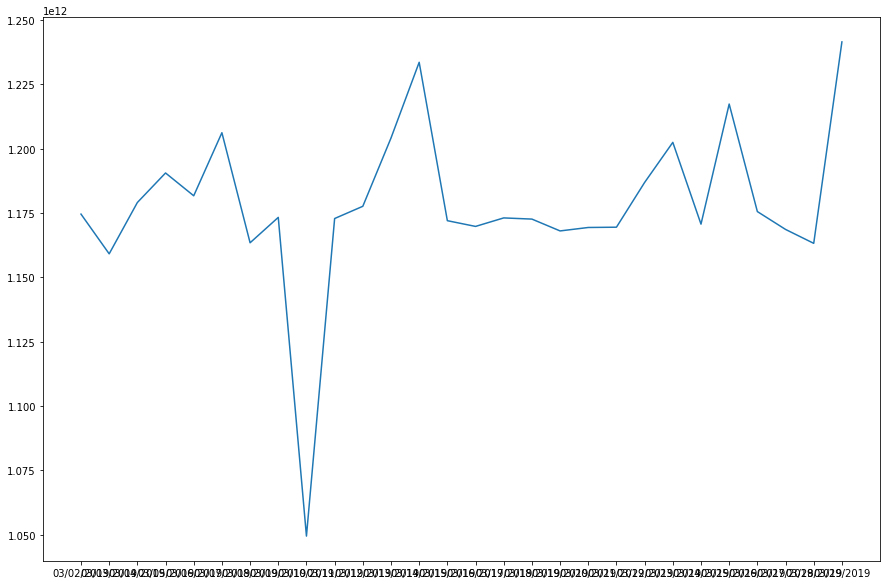

In [71]:
plt.figure(figsize=(15,10))
plt.plot(df.groupby(['DATE']).sum()['ENTRIES'])

### Challenge 5

In [75]:
df.groupby(['STATION','C/A','UNIT',]).sum()

ENTRIES         EXITS
STATION       C/A   UNIT                            
1 AV          H007  R248   75336806149   73565069591
              H008  R248  163944221969  174335349857
103 ST        N037  R314    4972615507    4288333973
              R170  R191   10781585117    5827829140
              R252  R180  115890160581  178317803154
...                                ...           ...
WTC-CORTLANDT R108  R305      50721756      51042918
              R108A R305       5739203      60331120
              R109  R305      38334076      13107745
YORK ST       N530  R301    7422778113    6048266443
ZEREGA AV     R419  R326     286609607     127112970

[745 rows x 2 columns]